In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os

# Настройка параметров
batch_size = 8
learning_rate = 1e-3
num_epochs = 20
image_size = (600, 600)
data_dir = 'C:/Users/kimsl/VKR/1/dataset_prepro_autoencoder'  # Укажите путь к вашему датасету

# Создание набора данных
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_paths = [os.path.join(img_dir, fname) for fname in os.listdir(img_dir) if fname.endswith('.jpg')]

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

dataset = CustomImageDataset(data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Создание модели автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # (B, 128, 75, 75)
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),  # (B, 512, 19, 19)
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=0),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 128, 76, 76)
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=0, output_padding=0),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 3, 600, 600)
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели, оптимизатора и функции потерь
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Обучение модели
for epoch in range(num_epochs):
    for data in dataloader:
        img = data.to(device)
        output = model(img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


C:\Users\kimsl\PycharmProjects\VKR\venv\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/20], Loss: 0.0022
Epoch [2/20], Loss: 0.0016
Epoch [3/20], Loss: 0.0008
Epoch [4/20], Loss: 0.0009
Epoch [5/20], Loss: 0.0009
Epoch [6/20], Loss: 0.0006
Epoch [7/20], Loss: 0.0010
Epoch [8/20], Loss: 0.0005
Epoch [9/20], Loss: 0.0006
Epoch [10/20], Loss: 0.0005
Epoch [11/20], Loss: 0.0005
Epoch [12/20], Loss: 0.0006
Epoch [13/20], Loss: 0.0006
Epoch [14/20], Loss: 0.0004
Epoch [15/20], Loss: 0.0005
Epoch [16/20], Loss: 0.0005
Epoch [17/20], Loss: 0.0004
Epoch [18/20], Loss: 0.0004
Epoch [19/20], Loss: 0.0004
Epoch [20/20], Loss: 0.0004


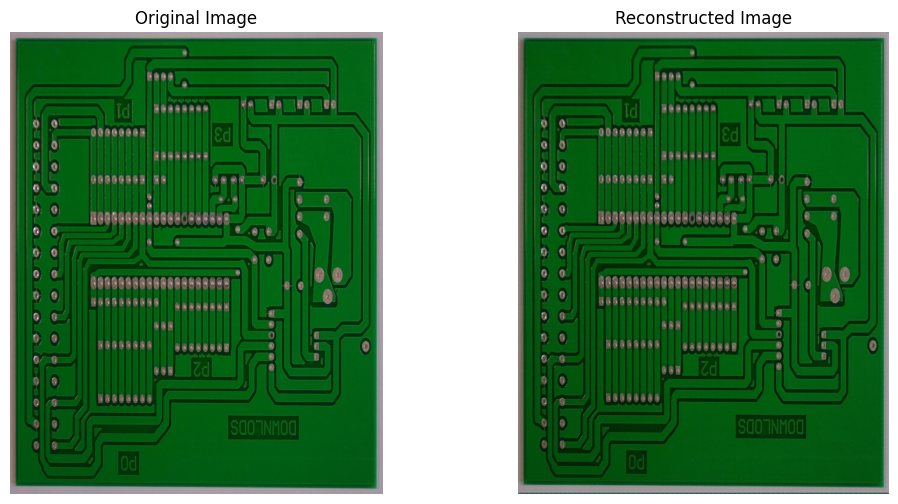

In [17]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Настройка параметров
image_size = (3056, 2464)
model_path = 'autoencoder.pth'  # Путь к сохраненной модели
image_path = 'C:/Users/kimsl/VKR/PCB_DATASET/images/Missing_hole/04_missing_hole_01.jpg' # Путь к изображению для сравнения

# Определение модели автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # (B, 128, 75, 75)
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),  # (B, 512, 19, 19)
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=0),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 128, 76, 76)
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=0, output_padding=0),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 3, 600, 600)
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели и загрузка весов
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Функция для загрузки и предобработки изображения
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    if transform:
        image = transform(image)
    return image

# Преобразования для изображения
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

# Загрузка изображения
input_image = load_image(image_path, transform=transform).unsqueeze(0).to(device)

# Прямой проход через модель
with torch.no_grad():
    reconstructed_image = model(input_image)

# Перевод тензоров в формат для визуализации
input_image = input_image.cpu().squeeze().permute(1, 2, 0).numpy()
reconstructed_image = reconstructed_image.cpu().squeeze().permute(1, 2, 0).numpy()

# Визуализация оригинального и реконструированного изображения
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(input_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image)
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

plt.show()


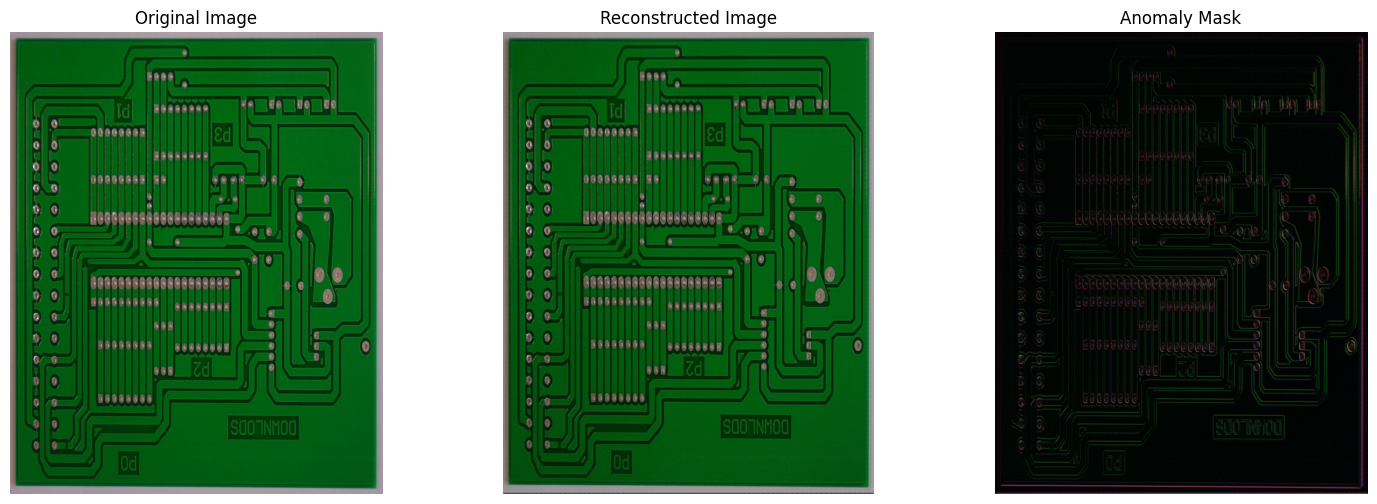

In [23]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Настройка параметров
image_size = (3056,2464)
model_path = 'autoencoder.pth'  # Путь к сохраненной модели
image_path = "C:/Users/kimsl/VKR/PCB_DATASET/images/Open_circuit/04_open_circuit_01.jpg" # Путь к изображению для сравнения

# Определение модели автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # (B, 128, 75, 75)
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),  # (B, 512, 19, 19)
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=0),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 128, 76, 76)
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=0, output_padding=0),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 3, 600, 600)
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели и загрузка весов
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Функция для загрузки и предобработки изображения
def load_image(image_path, transform=None):
    image = Image.open(image_path).convert('RGB')
    if transform:
        image = transform(image)
    return image

# Преобразования для изображения
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

# Загрузка изображения
input_image = load_image(image_path, transform=transform).unsqueeze(0).to(device)

# Прямой проход через модель
with torch.no_grad():
    reconstructed_image = model(input_image)

# Перевод тензоров в формат для визуализации и вычисление маски аномалий
input_image_np = input_image.cpu().squeeze().permute(1, 2, 0).numpy()
reconstructed_image_np = reconstructed_image.cpu().squeeze().permute(1, 2, 0).numpy()

# Преобразование реконструированного изображения в формат PIL
reconstructed_image_pil = Image.fromarray((reconstructed_image_np * 255).astype(np.uint8))

# Изменение размера реконструированного изображения
resized_reconstructed_image_pil = reconstructed_image_pil.resize((2464, 3056))

# Преобразование измененного изображения обратно в numpy
resized_reconstructed_image_np = np.array(resized_reconstructed_image_pil) / 255.0

anomaly_mask = np.abs(input_image_np - resized_reconstructed_image_np)

# Визуализация оригинального изображения, реконструированного изображения и маски аномалий
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(input_image_np)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_image_np)
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

axes[2].imshow(anomaly_mask, cmap='hot')
axes[2].set_title('Anomaly Mask')
axes[2].axis('off')

plt.show()

короч здесь оценка нейросети должна быть еще не тестил

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import numpy as np

# Настройка параметров
image_size = (600, 600)
batch_size = 16
model_path = 'autoencoder.pth'  # Путь к сохраненной модели
data_dir = 'path/to/your/test/data'  # Путь к тестовому набору данных

# Определение модели автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # (B, 128, 75, 75)
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),  # (B, 512, 19, 19)
            nn.ReLU(True)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=0),  # (B, 256, 38, 38)
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 128, 76, 76)
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 64, 150, 150)
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 32, 300, 300)
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1, output_padding=0),  # (B, 3, 600, 600)
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели и загрузка весов
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Преобразования для изображений
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

# Загрузка тестового набора данных
test_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Функция для оценки модели
def evaluate_model(model, data_loader):
    model.eval()
    total_loss = 0
    criterion = nn.MSELoss()
    
    with torch.no_grad():
        for data in data_loader:
            images, _ = data
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)
            total_loss += loss.item() * images.size(0)
    
    average_loss = total_loss / len(data_loader.dataset)
    return average_loss

# Оценка модели на тестовом наборе данных
test_loss = evaluate_model(model, test_loader)
print(f'Average reconstruction error (MSE) on test set: {test_loss:.4f}')


In [ ]:
 
# epochs = 20
# outputs = []
# losses = []
# for epoch in range(epochs):
#     for (image, _) in loader:
#        
#       # Reshaping the image to (-1, 784)
#       image = image.reshape(-1, 28*28)
#        
#       # Output of Autoencoder
#       reconstructed = model(image)
#        
#       # Calculating the loss function
#       loss = loss_function(reconstructed, image)
#        
#       # The gradients are set to zero,
#       # the gradient is computed and stored.
#       # .step() performs parameter update
#       optimizer.zero_grad()
#       loss.backward()
#       optimizer.step()
#        
#       # Storing the losses in a list for plotting
#       losses.append(loss)
#     outputs.append((epochs, image, reconstructed))
#  
# # Defining the Plot Style
# plt.style.use('fivethirtyeight')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
#  
# # Plotting the last 100 values
# plt.plot(losses[-100:])